In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(8)
n_assets = 50
sample = np.random.randint(0, 500, n_assets)

In [3]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_list = np.array(sp500[0]['Symbol'])[sample]

In [4]:
start_date = '2015-01-01'
end_date = '2024-05-20'

In [5]:
prices_df = yf.download(list(sp500_list), start=start_date, end=end_date)['Adj Close']
prices_df.dropna(axis=1, inplace=True) 

[*********************100%%**********************]  47 of 47 completed


In [6]:
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df.head()

Downloaded 2360 rows of data.


Ticker,A,ALL,ATO,AZO,BDX,CDNS,CI,CME,COF,COST,...,SBAC,SCHW,TDY,TMUS,TRGP,TRMB,TRV,UDR,WMB,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.551193,57.149807,44.366871,616.789978,119.417480,18.830000,97.028168,61.346504,68.960205,115.047577,...,105.557983,26.970394,102.160004,27.073481,64.964699,26.910000,85.263580,22.636890,25.889219,27.094410
2015-01-05,36.847565,56.016911,43.565247,608.489990,120.151802,18.400000,95.358025,61.694504,67.371841,113.739616,...,103.893349,26.069004,99.720001,26.706553,60.189159,26.030001,84.236572,22.875027,24.864410,26.786865
2015-01-06,36.273563,55.976147,43.295403,607.820007,119.921249,17.910000,95.735466,60.754868,66.117889,115.242584,...,103.351158,25.114056,98.019997,26.647051,58.320187,25.660000,83.484566,23.004915,24.526628,26.929390
2015-01-07,36.754974,56.897137,43.914478,607.239990,122.730339,18.420000,97.981163,61.457859,66.870232,117.249275,...,104.768478,25.604914,98.790001,28.015600,57.767967,25.340000,84.907768,23.163666,24.394945,27.161924
2015-01-08,37.856720,57.989265,44.208138,606.000000,124.967422,18.610001,102.972687,61.743214,67.522293,118.256699,...,105.814819,26.274267,100.440002,28.779211,59.400299,25.670000,86.670609,23.207317,24.629679,27.476978


In [7]:
ticker = np.random.choice(prices_df.columns)
data = prices_df[ticker].reset_index()
data.columns = ['Date', 'Close']

In [8]:
data = data[['Date', 'Close']]
data = data.dropna()

In [9]:
data['Prediction'] = data['Close'].shift(-1)
X = np.array(data.drop(['Prediction', 'Date'], axis=1))[:-1]
y = np.array(data['Prediction'])[:-1]

In [10]:
print(X.shape, y.shape)

(2359, 1) (2359,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)

In [14]:
model.fit(X, y)

LinearRegression()

In [27]:
future_days = 365 * 10
last_close = data['Close'].values[-1]
future_features = [last_close]

for _ in range(future_days - 1):
    next_close = model.predict(np.array(future_features[-1]).reshape(-1, 1))[0]
    future_features.append(next_close)

In [36]:
future_dates = pd.date_range(start='2024-01-01', periods=future_days)

In [37]:
predicted_data = pd.DataFrame(data={'Date': future_dates, 'Predicted Close': future_features})

In [38]:
predicted_data['Smoothed Close'] = predicted_data['Predicted Close'].rolling(window=30).mean()

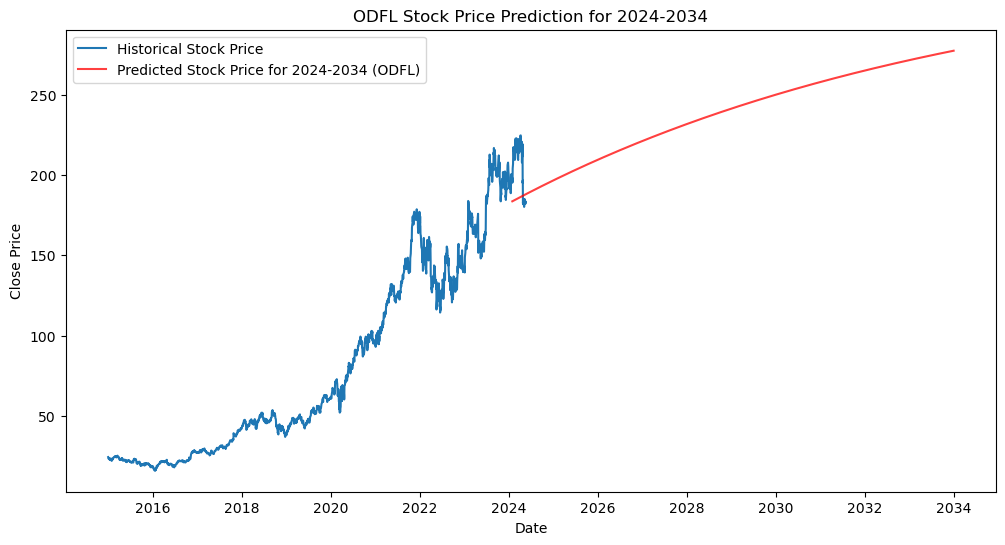

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Historical Stock Price')
plt.plot(predicted_data['Date'], predicted_data['Smoothed Close'], label=f'Predicted Stock Price for 2024-2034 ({ticker})', color='red', alpha=0.75)
plt.legend()
plt.title(f'{ticker} Stock Price Prediction for 2024-2034')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
test_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 4.670080125066302
